In [ ]:
# https://stackoverflow.com/a/64105308
# From here above
# !pip install mpl-scatter-density


In [88]:
import pandas as pd
import numpy as np
from scipy import stats

import mpl_scatter_density

# import matplotlib
# matplotlib.use('agg')

# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
df = pd.read_pickle('../data/joined_data_subset.p')

In [ ]:
df.columns

In [ ]:
p = sns.histplot(data=df, x="width_m")

In [3]:
plotting_df = df[df.columns.difference(['site_no', 'COMID', 'q_meas_td'])]

In [4]:
del df

In [5]:
float_cols = plotting_df.columns[plotting_df.dtypes.eq(np.float64)]
plotting_df[float_cols] = plotting_df[float_cols].apply(pd.to_numeric, downcast='float')
cols_to_plot = plotting_df.select_dtypes('number')

In [23]:
from functools import reduce

def freedman_diaconis(ds: pd.Series):
    """ |max - min| / h
        h = 2 * IQR * n**(-1/3)
    """
    _min, _max = ds.min(), ds.max()
    iqr = np.abs(reduce(lambda x, y: x - y, ds.quantile([0.25, 0.75])))
    if iqr == 0.0:
        iqr = 0.000001
    cube_root_n = len(ds.dropna()) ** (-1/3)
    h = 2 * iqr * cube_root_n
    
    fd = int(np.abs(_max - _min) / h)
    return fd if fd < 2000 else 2000
    
    
    

In [ ]:
# bins = np.zeros(len(cols_to_plot.columns))

# cols_to_plot.agg(freedman_diaconis)
# cols_to_plot.agg([freedman_diaconis, 'min', 'max'])
# for i, col in enumerate(cols_to_plot)
# np.abs(reduce(lambda x, y: x - y, ds.quantile([0.25, 0.75])))
# cols_to_plot.iloc[:,0].quantile([0.25, 0.75])
# len(cols_to_plot.iloc[:,0].dropna()) ** (-1/3)

# np.abs(reduce(lambda x,y: x - y, cols_to_plot.iloc[:,0].quantile([0.25, 0.75])))


In [44]:
def n_m_plot_size(df: pd.DataFrame):
    numeric_cols = df.select_dtypes('number')
    n_df_cols = len(numeric_cols.columns)
    
    n_cols = np.ceil(np.sqrt(n_df_cols))
    n_rows = n_df_cols // n_cols
    n_rows = n_rows if n_rows * n_cols >= n_df_cols else n_rows + 1
    
    return(int(n_rows), int(n_cols))
    
def column_histogram(df: pd.DataFrame):
    n_rows, n_cols = n_m_plot_size(df)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize= (25,25))
    
    flattened_axes = axes.ravel()

    for i, col in enumerate(numeric_cols):
        fd = freedman_diaconis(numeric_cols[col])
        flattened_axes[i].hist(numeric_cols[col], bins=fd)
        flattened_axes[i].set_title(col)
        
# col_to_plot = cols_to_plot.iloc[:, 0]
# ax.hist(col_to_plot, bins='fd', density=True)
# ax.set_title(col_to_plot.name)
# col_to_plot.plot(kind='density')
# cols_to_plot.plot(kind='hist', subplots=True, layout=(6, 6), figsize=(25,25), bins=300)
# cols_to_plot

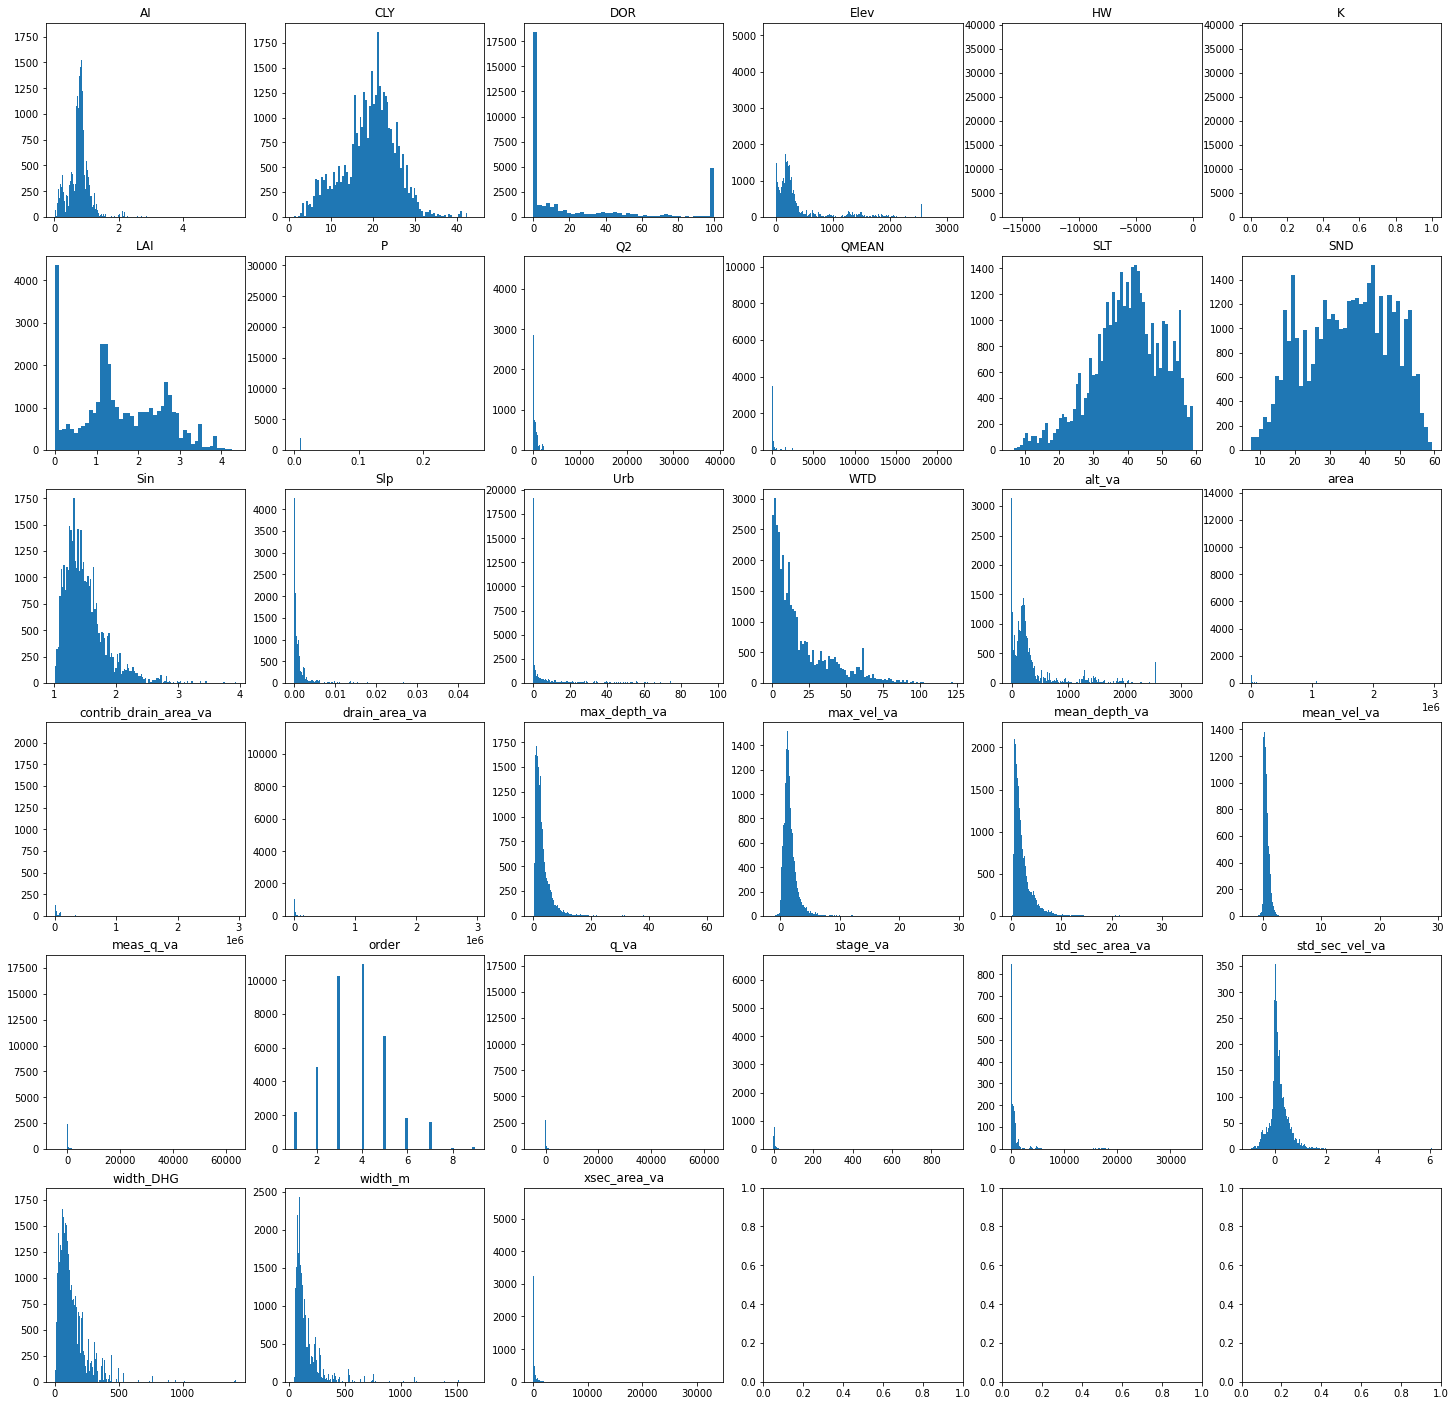

In [42]:
# np.reshape(cols_to_plot.columns), 
# l = cols_to_plot.columns.values
# l.resize(len(l))
# print(int(np.sqrt(len(cols_to_plot.columns))))

column_histogram(cols_to_plot)
# p = sns.pairplot(plotting_df[plotting_df.columns[plotting_df.dtypes.eq('float32')]].iloc[:,[0,1,2,3,4]])
# fig, axes = plt.subplots(6, 6, figsize=(25,25))

# for i, col in enumerate(cols_to_plot.columns):
#     ax = axes.flat[i]
#     sns.histplot(cols_to_plot[col], ax=ax)
# for i, ax in enumerate(axes.flat):
# plotting_df.plot()
# p = sns.pairplot(plotting_df)

In [ ]:
p.savefig('pairplot.png')
# p.figure.savefig('joined_data_pairplot.png')

In [43]:
plt.clf()

<Figure size 432x288 with 0 Axes>

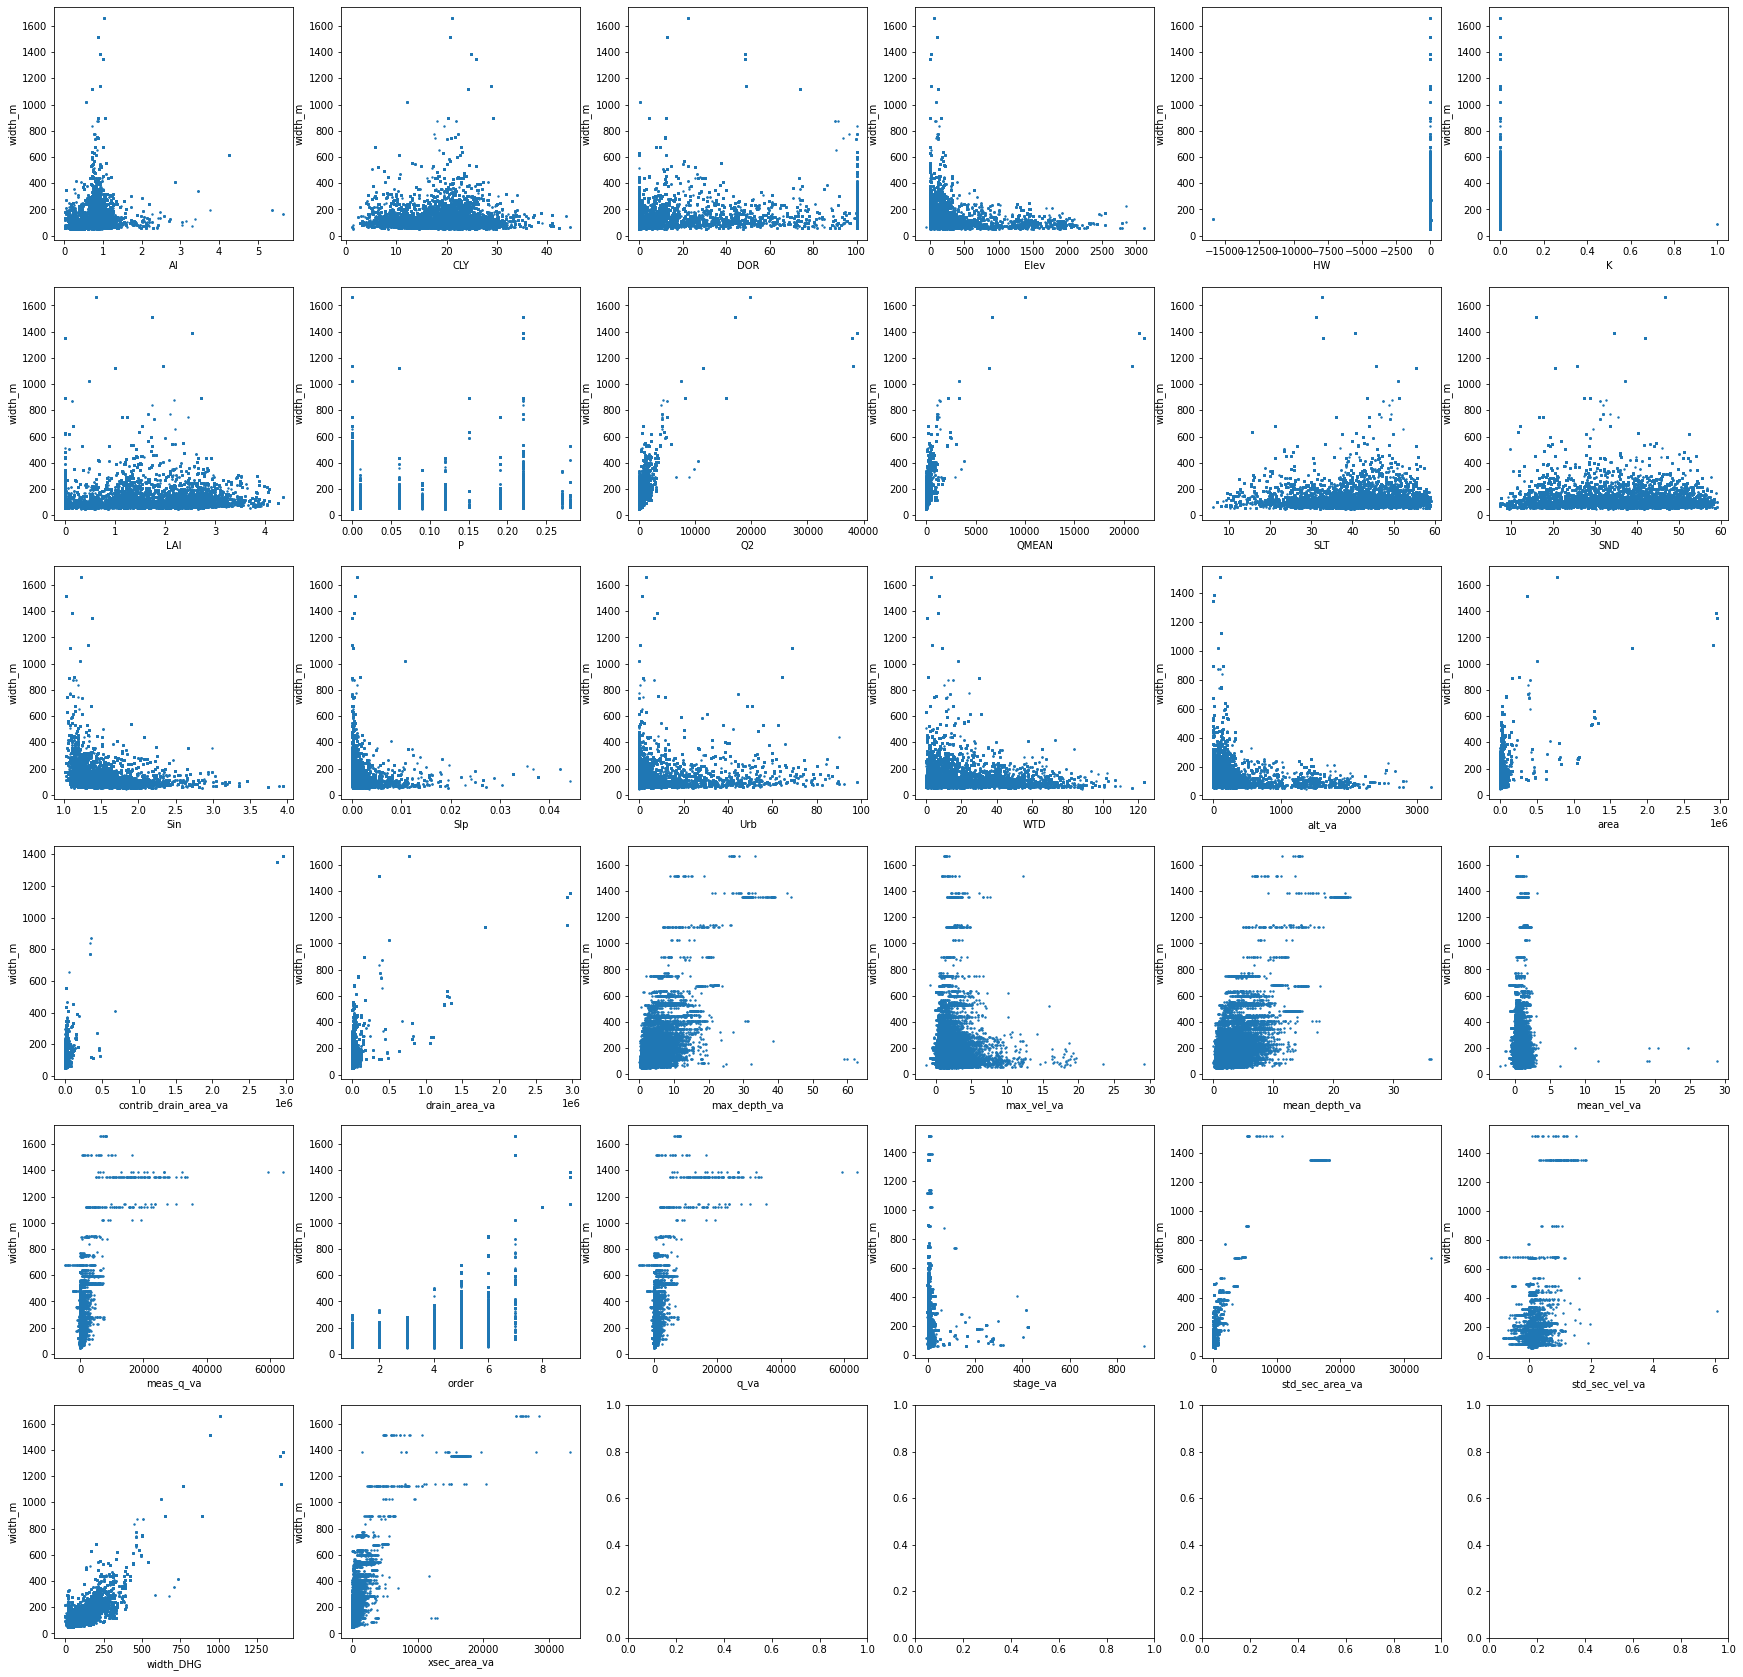

In [96]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

width = cols_to_plot['width_m']
others = cols_to_plot[cols_to_plot.columns.difference(['width_m'])]

rows, cols = n_m_plot_size(others)

f, axes = plt.subplots(rows, cols, figsize=(30,30), subplot_kw={'projection': 'scatter_density'})
flat_axes = axes.ravel()

y = width
y_name = y.name
for i, col in enumerate(others):
    x = others[col]
    x_name = x.name

#     flat_axes[i].scatter_density(x, y, cmap=white_viridis)
    flat_axes[i].scatter(x, y, s=2)
#     flat_axes[i].set_title(f"{y_name} ~ {x_name}")
    flat_axes[i].set_ylabel(y_name)
    flat_axes[i].set_xlabel(x_name)

    # f, axes = plt.subplots(rows, cols, figsize=(25,25))


# print(xy)
# print(xy)
# z = stats.gaussian_kde(xy)(xy)
# print(z)




In [98]:
cols_to_plot.shape

(38556, 33)